## 1. Bài toán đổi tiền (Change Coins)

Số lượng mỗi mệnh giá: [20, 0, 0, 0, 0, 0, 0, 0, 0]
Số lượng mỗi mệnh giá: [40, 0, 0, 0, 0, 0, 0, 0, 0]
Số lượng mỗi mệnh giá: [100, 0, 0, 0, 0, 0, 0, 0, 0]
Số lượng mỗi mệnh giá: [200, 0, 0, 0, 0, 0, 0, 0, 0]
Số lượng mỗi mệnh giá: [400, 0, 0, 0, 0, 0, 0, 0, 0]
Số lượng mỗi mệnh giá: [100, 0, 0, 0, 0, 0]
Số lượng mỗi mệnh giá: [200, 0, 0, 0, 0, 0]
Số lượng mỗi mệnh giá: [500, 0, 0, 0, 0, 0]
Số lượng mỗi mệnh giá: [1000, 0, 0, 0, 0, 0]
Số lượng mỗi mệnh giá: [2000, 0, 0, 0, 0, 0]


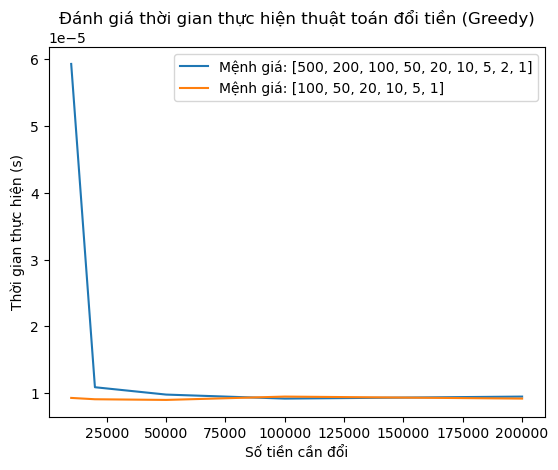

In [26]:
import time
import matplotlib.pyplot as plt

def greedy_atm(m, M):
    x = [0] * len(m)
    for i in range(len(m)):
        if M >= m[i]:
            x[i] = M // m[i]
            M -= m[i] * x[i]

    if M != 0:
        print("Không có cách đổi tiền")
    else:
        print("Số lượng mỗi mệnh giá:", x)
    return x

m_values = [[500, 200, 100, 50, 20, 10, 5, 2, 1], [100, 50, 20, 10, 5, 1]]
M_values = [10000, 20000, 50000, 100000, 200000]
times = []

for m in m_values:
    exec_times = []
    for M in M_values:
        start = time.perf_counter()
        greedy_atm(m, M)
        end = time.perf_counter()
        exec_times.append(end - start)
    times.append(exec_times)

for i, m in enumerate(m_values):
    plt.plot(M_values, times[i], label=f"Mệnh giá: {m}")

plt.xlabel("Số tiền cần đổi")
plt.ylabel("Thời gian thực hiện (s)")
plt.title("Đánh giá thời gian thực hiện thuật toán đổi tiền (Greedy)")
plt.legend()
plt.show()


## 2. Bài toán xếp balo

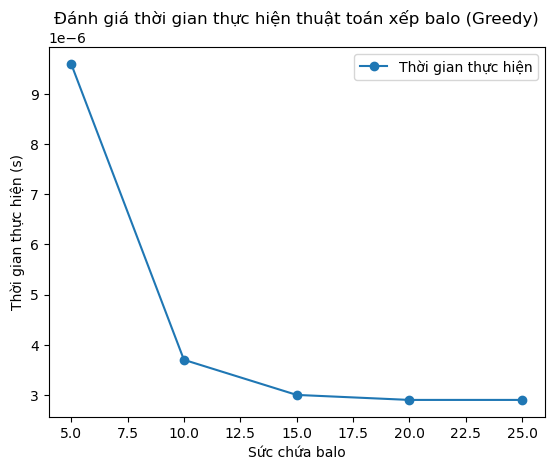

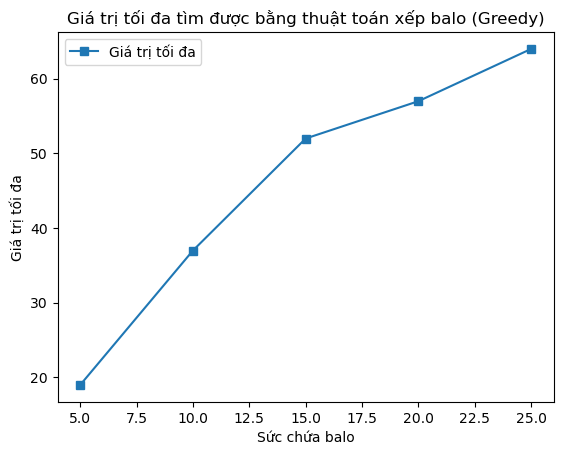

In [27]:
import time
import matplotlib.pyplot as plt

def knapsack_greedy(weights, values, capacity):
    index = list(range(len(weights)))
    ratio = [v / w for v, w in zip(values, weights)]
    index.sort(key=lambda i: ratio[i], reverse=True)

    max_value = 0
    selected_items = [0] * len(weights)

    for i in index:
        if weights[i] <= capacity:
            selected_items[i] = 1
            max_value += values[i]
            capacity -= weights[i]

    return max_value, selected_items

weights = [2, 3, 5, 7, 1, 4, 1]
values = [10, 5, 15, 7, 6, 18, 3]
capacities = [5, 10, 15, 20, 25]
times = []
results = []

for capacity in capacities:
    start = time.perf_counter()
    result = knapsack_greedy(weights, values, capacity)
    end = time.perf_counter()
    times.append(end - start)
    results.append(result[0])

plt.plot(capacities, times, marker='o', label="Thời gian thực hiện")
plt.xlabel("Sức chứa balo")
plt.ylabel("Thời gian thực hiện (s)")
plt.title("Đánh giá thời gian thực hiện thuật toán xếp balo (Greedy)")
plt.legend()
plt.show()

plt.plot(capacities, results, marker='s', label="Giá trị tối đa")
plt.xlabel("Sức chứa balo")
plt.ylabel("Giá trị tối đa")
plt.title("Giá trị tối đa tìm được bằng thuật toán xếp balo (Greedy)")
plt.legend()
plt.show()

## 3. Bài toán lập lịch sử dụng tài nguyên (Activity Selection/Task Scheduling)

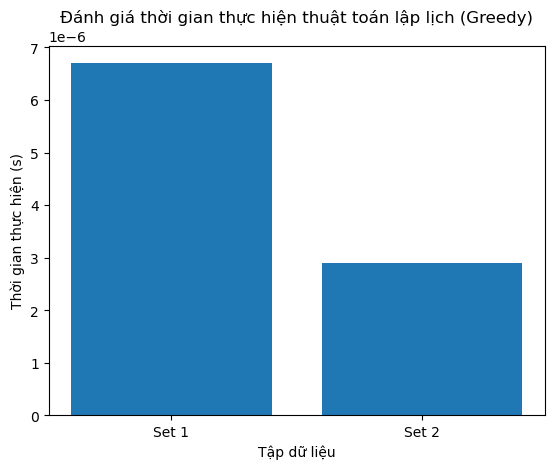

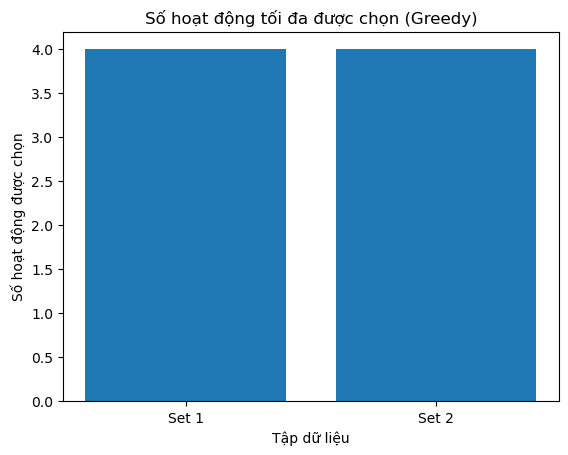

In [28]:
import time
import matplotlib.pyplot as plt

def activity_selection(start, end):
    n = len(start)
    activities = sorted(range(n), key=lambda i: end[i])

    selected = []
    last_end = -1

    for i in activities:
        if start[i] >= last_end:
            selected.append(i)
            last_end = end[i]

    return selected

start_times = [[1, 3, 0, 5, 8, 5], [2, 3, 6, 7, 9, 4, 5]]
end_times = [[2, 4, 6, 7, 9, 9], [5, 4, 8, 9, 11, 7, 10]]
times = []
num_activities = []

for start, end in zip(start_times, end_times):
    start_time = time.perf_counter()
    result = activity_selection(start, end)
    end_time = time.perf_counter()
    times.append(end_time - start_time)
    num_activities.append(len(result))

plt.bar(range(len(times)), times, tick_label=[f"Set {i+1}" for i in range(len(times))])
plt.xlabel("Tập dữ liệu")
plt.ylabel("Thời gian thực hiện (s)")
plt.title("Đánh giá thời gian thực hiện thuật toán lập lịch (Greedy)")
plt.show()

plt.bar(range(len(num_activities)), num_activities, tick_label=[f"Set {i+1}" for i in range(len(num_activities))])
plt.xlabel("Tập dữ liệu")
plt.ylabel("Số hoạt động được chọn")
plt.title("Số hoạt động tối đa được chọn (Greedy)")
plt.show()

## 4. Thuật toán Prim tìm cây bao trùm tối thiểu (Minimal Spanning Tree).

In [1]:
import time
import heapq
import random
import matplotlib.pyplot as plt

# Thuật toán Prim để tìm MST
def prim_mst(n, edges):
    graph = {i: [] for i in range(n)}
    for u, v, weight in edges:
        graph[u].append((weight, v))
        graph[v].append((weight, u))

    mst = []
    visited = set()
    min_heap = [(0, 0)]

    while len(mst) < n - 1:
        weight, u = heapq.heappop(min_heap)
        if u in visited:
            continue
        visited.add(u)
        mst.append((u, weight))
        for w, v in graph[u]:
            if v not in visited:
                heapq.heappush(min_heap, (w, v))
    return mst

def generate_graph(n, m):
    edges = set()
    while len(edges) < m:
        u, v = random.sample(range(n), 2)
        weight = random.randint(1, 100)
        edges.add((u, v, weight))
    return list(edges)

sizes = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
times = []

for n in sizes:
    m = n * 2
    edges = generate_graph(n, m)

    start_time = time.time()
    prim_mst(n, edges)
    end_time = time.time()

    times.append(end_time - start_time)

plt.plot(sizes, times, marker='o', linestyle='-', color='r', label='Prim')
plt.xlabel('Số đỉnh (n)')
plt.ylabel('Thời gian thực thi (giây)')
plt.legend()
plt.grid()
plt.show()


IndexError: index out of range

## 5. Thuật toán Kruskal tìm cây bao trùm tối thiểu (Minimal Spanning Tree).

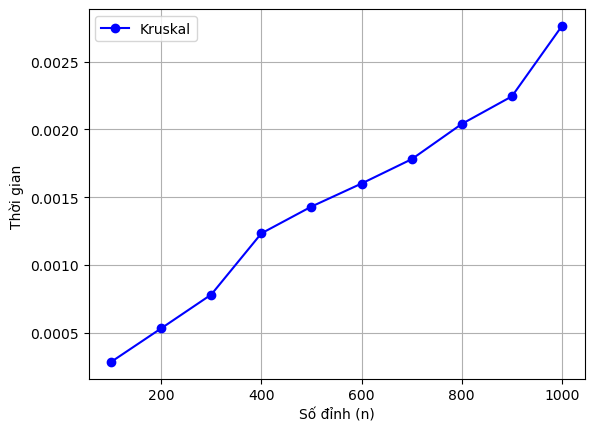

In [35]:
import time
import random
import matplotlib.pyplot as plt

class DisjointSet:
    def __init__(self, n):
        self.parent = list(range(n))
        self.rank = [0] * n

    def find(self, u):
        if self.parent[u] != u:
            self.parent[u] = self.find(self.parent[u])
        return self.parent[u]

    def union(self, u, v):
        root_u = self.find(u)
        root_v = self.find(v)
        if root_u != root_v:
            if self.rank[root_u] > self.rank[root_v]:
                self.parent[root_v] = root_u
            elif self.rank[root_u] < self.rank[root_v]:
                self.parent[root_u] = root_v
            else:
                self.parent[root_v] = root_u
                self.rank[root_u] += 1

def kruskal_mst(n, edges):
    edges.sort(key=lambda edge: edge[2])  # Sắp xếp theo trọng số
    ds = DisjointSet(n)
    mst = []

    for u, v, weight in edges:
        if ds.find(u) != ds.find(v):
            ds.union(u, v)
            mst.append((u, v, weight))
            if len(mst) == n - 1:
                break
    return mst

def generate_graph(n, m):
    edges = set()
    while len(edges) < m:
        u, v = random.sample(range(n), 2)
        weight = random.randint(1, 100)
        edges.add((u, v, weight))
    return list(edges)

sizes = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
times = []

for n in sizes:
    m = n * 2
    edges = generate_graph(n, m)

    start_time = time.perf_counter()
    kruskal_mst(n, edges)
    end_time = time.perf_counter()

    times.append(end_time - start_time)

plt.plot(sizes, times, marker='o', linestyle='-', color='b', label='Kruskal')
plt.xlabel('Số đỉnh (n)')
plt.ylabel('Thời gian ')
plt.legend()
plt.grid()
plt.show()

## 6. Thuật toán Dijkstra.

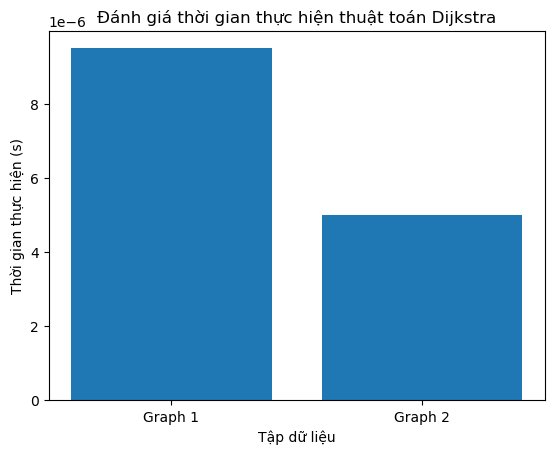

In [29]:
import time
import heapq
import matplotlib.pyplot as plt

def dijkstra(graph, start):
    n = len(graph)
    distances = {node: float('inf') for node in graph}
    distances[start] = 0
    priority_queue = [(0, start)]

    while priority_queue:
        current_distance, current_node = heapq.heappop(priority_queue)

        if current_distance > distances[current_node]:
            continue

        for neighbor, weight in graph[current_node]:
            distance = current_distance + weight
            if distance < distances[neighbor]:
                distances[neighbor] = distance
                heapq.heappush(priority_queue, (distance, neighbor))

    return distances

# Đánh giá thời gian thực hiện
graphs = [
    {
        0: [(1, 4), (2, 1)],
        1: [(3, 1)],
        2: [(1, 2), (3, 5)],
        3: []
    },
    {
        0: [(1, 10), (2, 3)],
        1: [(2, 1), (3, 2)],
        2: [(1, 4), (3, 8), (4, 2)],
        3: [(4, 7)],
        4: [(3, 9)]
    }
]

start_nodes = [0, 0]
times = []

for i, graph in enumerate(graphs):
    start_time = time.perf_counter()
    dijkstra(graph, start_nodes[i])
    end_time = time.perf_counter()
    times.append(end_time - start_time)

# Vẽ biểu đồ
plt.bar(range(len(times)), times, tick_label=[f"Graph {i+1}" for i in range(len(times))])
plt.xlabel("Tập dữ liệu")
plt.ylabel("Thời gian thực hiện (s)")
plt.title("Đánh giá thời gian thực hiện thuật toán Dijkstra")
plt.show()


## 7. Huffman code and tree.

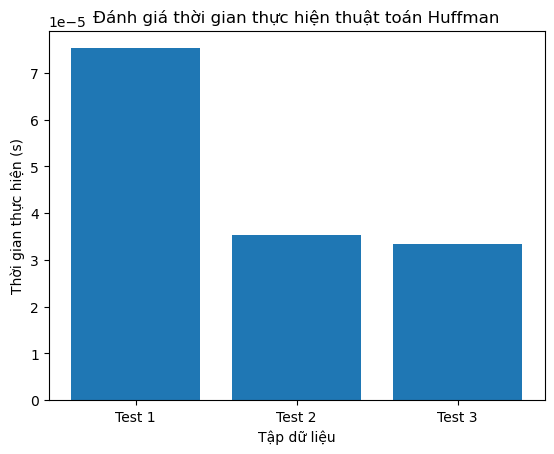

In [30]:
import time
import heapq
import matplotlib.pyplot as plt
from collections import Counter, namedtuple

class HuffmanNode(namedtuple("HuffmanNode", ["char", "freq", "left", "right"])):
    def __lt__(self, other):
        return self.freq < other.freq

def build_huffman_tree(text):
    freq = Counter(text)
    priority_queue = [HuffmanNode(char, freq, None, None) for char, freq in freq.items()]
    heapq.heapify(priority_queue)

    while len(priority_queue) > 1:
        left = heapq.heappop(priority_queue)
        right = heapq.heappop(priority_queue)
        merged = HuffmanNode(None, left.freq + right.freq, left, right)
        heapq.heappush(priority_queue, merged)

    return priority_queue[0] if priority_queue else None

def build_huffman_codes(node, prefix="", code_map={}):
    if node:
        if node.char:
            code_map[node.char] = prefix
        build_huffman_codes(node.left, prefix + "0", code_map)
        build_huffman_codes(node.right, prefix + "1", code_map)
    return code_map

def huffman_encoding(text):
    root = build_huffman_tree(text)
    huffman_codes = build_huffman_codes(root) if root else {}
    encoded_text = "".join(huffman_codes[char] for char in text)
    return encoded_text, huffman_codes

# Đánh giá thời gian thực hiện
test_cases = ["Bui Tho An - K67A3", "This is a test string", "Nguyen Thi Yen Nhi"]
times = []

for text in test_cases:
    start_time = time.perf_counter()
    huffman_encoding(text)
    end_time = time.perf_counter()
    times.append(end_time - start_time)

plt.bar(range(len(times)), times, tick_label=[f"Test {i+1}" for i in range(len(times))])
plt.xlabel("Tập dữ liệu")
plt.ylabel("Thời gian thực hiện (s)")
plt.title("Đánh giá thời gian thực hiện thuật toán Huffman")
plt.show()